# <h2><span style="color:#2ecc71"><strong><span style="font-family:Verdana,Geneva,sans-serif">Sobre este experimento...</span></strong></span></h2> 

# <h2><span style="color:#8e44ad"><span style="font-family:Arial,Helvetica,sans-serif"><u>Formalizaci&oacute;n del experimento</u></span></span></h2>

## Definición del operador RB

Este es el operador de reduccion a base (RB):  
Se define como RB(n, m), donde RB es el operador, n el numero, y m el metodo
Consiste en dado un numero, obtener la reduccion de ese numero aplicando una suma de sus cifras hasta dejarlo en el rango de numeros perteneciente a la base. Se asume base 10 aunque se podria definir para cualquier base.

- Se puede definir para la suma y para la resta
- Se puede definir tanto para enteros como flotantes

Ej: 

- RB(15, +) = 1 + 5 = 6 
- RB(19, +) = 1 + 9 = 10 = 1 + 0 = 1
- RB(19, -) = 1 - 9 = 8




In [1]:
def RB_10(n, method):
    
    # La base es 10
    b = 10
    
    # Si el metodo es +, sumamos los dígitos del número
    if method == "+":
        n = sum(int(i) for i in str(n))
    
    # Si el metodo es -, restamos los dígitos del número
    elif method == "-":
        n = int(str(n)[0]) - sum(int(i) for i in str(n)[1:])
        if n < 0:
            n = -n
            
    # Reducimos el número hasta que sea menor que la base
    while n >= b:
        n = sum(int(i) for i in str(n))
    return n

print(RB_10(15, "+"))  # Output: 6
print(RB_10(19, "+"))  # Output: 1
print(RB_10(19, "-"))  # Output: 8

6
1
8


In [2]:
# Definimos una funcion para calcular el valor de la reduccion a la base 10
def RB(n:int):
    while n > 9:
        n = sum(int(d) for d in str(n))

    return n

print(RB(12))
print(RB(123))

3
6


## Cálculo de la sucesion

In [3]:
def an_k(a, n, k, a_args=None):
    """
    Funcion que calcula una sucecion de numeros a partir de una funcion a
    
    Parametros
    ----------
    a: funcion
        Funcion que calcula el valor de la sucecion
        
    n: int
        Valor inicial de la sucecion

    k: int
        Numero de elementos de la sucecion
        
    a_args: tuple
        Argumentos de la funcion a
        
    Returns
    -------
    
    k_list: list
        Lista con los k elementos de la sucecion      
    
    """
    
    k_list = []
    
    if a_args is None:
        for i in range(k):
            an = a(n)
            k_list.append(an)
            n+=1
    else:
        for i in range(k):
            an = a(n, a_args)
            k_list.append(an)
            n+=1
        
    return k_list


In [4]:
def n_mas_uno(n):
    return n+1

In [5]:
an_k(n_mas_uno, 0, 10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Definicion de las sucesiones a explorar

### Generación mediante cálculo

In [6]:
import operator
from functools import reduce

#### Producto de cifras

In [7]:

def producto(n:int):
    """
    Funcion que calcula el producto de los digitos de un numero

    Args:
        n (int): Numero entero

    Returns:
        int: Producto de los digitos del numero
    """

    # Convertir el número en una lista de dígitos
    digits = list(map(int, str(n)))
    # Calcular el producto de los dígitos
    product = reduce(operator.mul, digits)

    return product

Test de la sucesión

In [8]:
an_k(producto, 0, 25)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 4, 6, 8]

In [9]:
an_k(producto, 25, 20)

[10, 12, 14, 16, 18, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 0, 4, 8, 12, 16]

Test de la sucesion bajo el operador RB_10

In [10]:
n = 1231
method = "+"
print("producto(" + str(n) + "):", producto(n), "->", "RB_10(" + str(producto(n)) + ", " + method + ") =", RB_10(producto(n), method))

n = 229
method = "-"
print("producto(" + str(n) + "):", producto(n), "->", "RB_10(" + str(producto(n)) + ", " + method + ") =", RB_10(producto(n), method))

producto(1231): 6 -> RB_10(6, +) = 6
producto(229): 36 -> RB_10(36, -) = 3


#### Exponenciacion de cifras

In [11]:
def exp_k(n:int, args:list):
    """
    Función que toma un número entero n, obtiene sus digitos y los eleva a la k-ésima potencia
    
    Args:
        n (int): Numero entero
        k (int): Potencia a la que se elevaran los digitos del numero (primer elemento de la lista args)
        
        
    Returns:
        int: Numero entero
    """
    
    k = args[0]
    
    # Convertir el número en una lista de dígitos
    digits = list(map(int, str(n)))

    # Elevar cada dígito al cuadrado
    digits = [d**k for d in digits]

    # Convertir la lista de dígitos en un número
    z = int("".join(map(str, digits)))
    
    return z

Test de la sucesión

In [12]:
an_k(exp_k, 0, 10, [2])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [13]:
an_k(exp_k, 0, 10, [3])

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

Test del operador

In [14]:
n = 1231
k = 0
method = "+"
print("exp_k("+ str(n) + ", [" + str(k) + "]):", exp_k(n, [k]), "->", "RB_10(" + str(exp_k(n, [k])) + ", " + method + ") =", RB_10(exp_k(n, [k]), method))
# ----------------------------

n = 222
k = 2
method = "+"
print("exp_k("+ str(n) + ", [" + str(k) + "]):", exp_k(n, [k]), "->", "RB_10(" + str(exp_k(n, [k])) + ", " + method + ") =", RB_10(exp_k(n, [k]), method))
# ----------------------------


n = 99
k = 7
method = "-"
print("exp_k("+ str(n) + ", [" + str(k) + "]):", exp_k(n, [k]), "->", "RB_10(" + str(exp_k(n, [k])) + ", " + method + ") =", RB_10(exp_k(n, [k]), method))
# ----------------------------


exp_k(1231, [0]): 1111 -> RB_10(1111, +) = 4
exp_k(222, [2]): 444 -> RB_10(444, +) = 3
exp_k(99, [7]): 47829694782969 -> RB_10(47829694782969, -) = 1


#### Numeros primos

In [15]:
def n_primo(n: int):
    """
    Función que toma un número entero n y devuelve el n-ésimo número primo. aplica el operador de reducción a la base 10.

    Params:
        n: int, entero del cual se calculará el n-ésimo número primo.

    Return:
        n-ésimo número primo con reducción a la base 10.
    """


    if n == 1:
        return 2
    if n == 2:
        return 3
    if n == 3:
        return 5
    if n == 4:
        return 7
    if n == 5:
        return 11 # 11
    if n == 6:
        return 13 # 13   

    primes = [2, 3, 5, 7, 11, 13]  # los primeros 6 primos
    num = 14  # siguiente número a evaluar
    prime_count = 6  # contador de números primos encontrados

    while prime_count < n:
        for p in primes:
            if num % p == 0:
                break
        else:
            prime_count += 1
            if prime_count == n:
                return num
        num += 1

In [118]:
an_k(n_primo, 0, 10)

[None, 2, 3, 5, 7, 11, 13, 17, 19, 23]

In [17]:
# Testeamos la función de los primos

for i in range(1, 10):
    print("n_primo(" + str(i) + ") ->", n_primo(i), end=", ")

n_primo(1) -> 2, n_primo(2) -> 3, n_primo(3) -> 5, n_primo(4) -> 7, n_primo(5) -> 11, n_primo(6) -> 13, n_primo(7) -> 17, n_primo(8) -> 19, n_primo(9) -> 23, 

#### Fibonacci

In [18]:
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [19]:
an_k(fibonacci, 0, 10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

#### Otras

In [20]:
def n_catalan(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        res = 0
        for i in range(n):
            res += n_catalan(i) * n_catalan(n-i-1)
        return res


In [21]:
an_k(n_catalan, 0, 10)

[0, 1, 0, 1, 0, 2, 0, 5, 0, 14]

In [22]:
print("20 primeros de proucto de cifras:", an_k(producto, 0, 20))
print("20 primeros de potencia de cifras: exp = 2", an_k(exp_k, 0, 20, [2]))
print("20 primeros de potencia de cifras: exp = 3", an_k(exp_k, 0, 20, [3]))

20 primeros de proucto de cifras: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
20 primeros de potencia de cifras: exp = 2 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 10, 11, 14, 19, 116, 125, 136, 149, 164, 181]
20 primeros de potencia de cifras: exp = 3 [0, 1, 8, 27, 64, 125, 216, 343, 512, 729, 10, 11, 18, 127, 164, 1125, 1216, 1343, 1512, 1729]


### Obtención mediante dataset

#### Fibonacci

In [48]:
# Leer csv de datos de fibonacci
import pandas as pd
df = pd.read_csv('datasets/fibonacci_sequence.csv')
df.head()

,Iteration,Value
0,0,0
1,1,1
2,2,1
3,3,2
4,4,3


In [51]:
# Funcion que obtiene fibonacci de n de la lista de datos
def dataset_fibonacci(n):
    return int(df['Value'][n])

# Testeamos la funcion
print("dataset_fibonacci(0) = ", dataset_fibonacci(0))
print("dataset_fibonacci(1) = ", dataset_fibonacci(1))
print("dataset_fibonacci(2) = ", dataset_fibonacci(2))
print("dataset_fibonacci(3) = ", dataset_fibonacci(3))
print("dataset_fibonacci(23) = ", dataset_fibonacci(23))

dataset_fibonacci(0) =  0
dataset_fibonacci(1) =  1
dataset_fibonacci(2) =  1
dataset_fibonacci(3) =  2
dataset_fibonacci(23) =  28657


# <h2><span style="color:#8e44ad"><span style="font-family:Arial,Helvetica,sans-serif"><u>Visualizacion de los datos</u></span></span></h2>

## Representación matricial

Definimos una funcion para generar una representacion matricial de los datos

In [69]:

def gen_matrix(a, method, n_i, w, h, a_args=None):
    """
    Funcion que toma un número entero n_i, un ancho w y un alto h y devuelve una lista de listas con los números de la sucesión.

    Params:
        a:función, función que calcula los números de la sucesión.
        method:str, método de reducción a la base 10.
        n_i:int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.
        w:int, ancho
        h:int, alto

    Return:
        lista de listas con los números de la sucesión.

    """ 

    data_list = []
    for i in range(h):
        if a_args is None:
            k_list = an_k(a, n_i, w)
        else:
            k_list = an_k(a, n_i, w, a_args)
        
        for j in range(len(k_list)):
            k_list[j] = RB_10(k_list[j], method)
        
        data_list.append(k_list)
        n_i += w

    return data_list


   

Probamos la funcion:


- Creamos una matriz de 10x10

In [27]:
# Configuracion de la sucesion
# --------------------------------

n_0 = 0                 # Termino inicial de la sucesion
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# --------------------------------

gen_matrix(producto, "+", n_0, w, h)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 2, 4, 6, 8, 1, 3, 5, 7, 9],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 4, 8, 3, 7, 2, 6, 1, 5, 9],
 [0, 5, 1, 6, 2, 7, 3, 8, 4, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 7, 5, 3, 1, 8, 6, 4, 2, 9],
 [0, 8, 7, 6, 5, 4, 3, 2, 1, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9]]

In [28]:
gen_matrix(producto, "-", n_0, w, h)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 2, 4, 6, 8, 1, 1, 3, 5, 7],
 [0, 3, 6, 9, 1, 4, 7, 1, 2, 5],
 [0, 4, 8, 1, 5, 2, 2, 6, 1, 3],
 [0, 5, 1, 4, 2, 3, 3, 2, 4, 1],
 [0, 6, 1, 7, 2, 3, 3, 2, 4, 1],
 [0, 7, 3, 1, 6, 2, 2, 5, 1, 3],
 [0, 8, 5, 2, 1, 4, 4, 1, 2, 5],
 [0, 9, 7, 5, 3, 1, 1, 3, 5, 7]]

## Supermatrices

Una vez visto como podemos crear clusters, podemos crear una matiz de matrices (Supermatriz), considerando cada matriz un elemento, de esta forma:

- Una matriz de matrices de 10x10 estara compuesta por 100 matrices


<p><span style="color: #00ff00;"><strong>La visualizacion de la Supermatriz, nos da indicio de que existe cierta simetria para algunas sucesiones cuando aplicamos el operador RB (Reduccion a la Base)</strong> </span></p>

Para facilitar el proceso de visualizacion, se procede a codificar con un color cada valor posible (0-9).

La implementacion de esta funcionalidad esta basada en crear una lista de clusters del tamaño equivalente a la dimension de matriz deseada (h*w)

Cada cluster de la lista se codificara en una imagen de las mismas dimensiones que la matriz, y los clusters se iran concatenando en la imagen de izquierda a derecha y de arriba a abajo. (Notese que esto es experimental y no es ninguna regla, se podria implementar multiples variaciones, lo que daria lugar a simetrias con distinto eje, pero simetrias igualmente)

In [100]:
def gen_matrix_list(a, method: str, n_0: int, w: int, h: int, count: int, offset:int, a_args=None) -> list[list[int]]:
    """
    Funcion que toma un número entero n_0, un número entero count y un número entero offset y devuelve una lista de listas de listas con los números de la sucesión.

    Params:
        n_0: int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.
        count: int, cantidad de clusters
        offset: int, offset entre clusters

    Return:
        lista de listas de listas con los números de la sucesión.

    """ 

    cluster = []
    for i in range(count):
        if a_args is None:
            data_list = gen_matrix(a, method, n_0, w, h)
        else:
            data_list = gen_matrix(a, method, n_0, w, h, a_args)
        cluster.append(data_list)
        n_0 += offset

    return cluster


Crear lista de 100 matrices:


- Como termino inicial de la sucesion, definimos n_0
- Como ancho de matriz w
- Como alto de matriz h



In [30]:
# Configuracion de la sucesion deseada
# --------------------------------

a = producto            # Funcion que calcula los numeros de la sucesion
method = "+"            # Metodo de reduccion a la base 10
n_0 = 0                 # Termino inicial de la sucesion

# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho de la matriz
h = 10                  # Alto de la matriz

# Configuracion de la matriz de clusters deseada
m_w = 10                # Ancho de la supermatriz
m_h = 10                # Alto de la supermatriz
offset = h*w            # Offset entre matrices (distancia entre matrices)

# Configuracion de la lista de matrices
# --------------------------------
cluster_count = m_w * m_h


# Obtenemos la lista de matrices
# --------------------------------
matrix_0_to_99 = gen_matrix_list(a, "+", n_0, w, h, cluster_count, offset)

In [31]:
matrix_0_to_99[1]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 2, 4, 6, 8, 1, 3, 5, 7, 9],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 4, 8, 3, 7, 2, 6, 1, 5, 9],
 [0, 5, 1, 6, 2, 7, 3, 8, 4, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 7, 5, 3, 1, 8, 6, 4, 2, 9],
 [0, 8, 7, 6, 5, 4, 3, 2, 1, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9]]

In [32]:
matrix_0_to_99[3]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9],
 [0, 3, 6, 9, 3, 6, 9, 3, 6, 9],
 [0, 6, 3, 9, 6, 3, 9, 6, 3, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9]]

In [33]:
print("Supermatriz de matrices: ")
print("--------------------------")
print("Numero de matrices: ", len(matrix_0_to_99))
print("Numero de filas por matriz: ", len(matrix_0_to_99[0]))
print("Numero de columnas por matriz: ", len(matrix_0_to_99[0][0]))

Supermatriz de matrices: 
--------------------------
Numero de matrices:  100
Numero de filas por matriz:  10
Numero de columnas por matriz:  10


## Representación grafica

La representacion grafica puede implementarse usando distintas tecnicas.
Siguiendo con la estructura matricial, vamos a representar los datos como una supermatriz en la que cada dato esta cofificado mediante un color

### Manejo del color

#### Blanco y negro

In [34]:

def number_to_gray(number):
    gray = int((255/9) * number)
    return (gray, gray, gray)


#### A color

Podemos definir tambien distintas paletas de color

In [35]:
default_colors = {
    1: (255, 0, 0),      # red
    2: (255, 128, 0),    # orange
    3: (255, 255, 0),    # yellow
    4: (0, 255, 0),      # green
    5: (0, 255, 255),    # cyan
    6: (0, 0, 255),      # blue
    7: (128, 0, 255),    # purple
    8: (255, 0, 255),    # magenta
    9: (255, 255, 255),  # white
    0: (0, 0, 0)         # black
}

neon_colors = {
    1: (255, 127, 0),     # neon orange
    2: (255, 0, 255),     # neon pink
    3: (0, 255, 0),       # neon green
    4: (0, 255, 255),     # neon cyan
    5: (255, 0, 0),       # neon red
    6: (255, 165, 0),     # neon yellow
    7: (0, 0, 255),       # neon blue
    8: (255, 192, 203),   # neon pink
    9: (173, 255, 47),    # neon green
    0: (138, 43, 226)     # neon blue
}

blues = {
    0: (0, 0, 0),         # black
    1: (51, 153, 255),    # baby blue
    2: (102, 255, 255),   # light blue
    3: (0, 153, 153),     # teal
    4: (0, 153, 255),     # steel blue
    5: (0, 255, 255),     # cyan
    6: (0, 0, 255),       # blue
    7: (102, 0, 153),     # dark blue
    8: (255, 0, 204),     # electric blue
    9: (255, 255, 255)    # white
}



In [36]:
def number_to_color(number, palette=default_colors):
    return palette[number]


In [37]:
number_to_color(5, default_colors)

(0, 255, 255)

### Generacion de la imagen

Usamos la libreria Pillow

In [38]:
%pip install Pillow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Definimos una funcion para generar la imagen de la matriz

In [57]:
from PIL import Image
from IPython.display import display

def create_matrix_image(data, scale=1, paint_function=number_to_color, palette=None):
    width = len(data[0])
    height = len(data)

    image = Image.new('RGB', (width*scale, height*scale), (255, 255, 255))
    pixels = image.load()
    for i, row in enumerate(data):
        for j, number in enumerate(row):
            if palette is None:
                color = paint_function(number)
            else:
                color = paint_function(number, palette)
            for x in range(scale):
                for y in range(scale):
                    pixels[j*scale+x, i*scale+y] = color
    return image

Definimos una funcion para generar la imagen d ela supermatriz

In [81]:
# Creamos una imagen global a partir de la lista de sublistas de clusters
# ----------------------------------------------------------------------

def create_supermatrix_image(supermatrix, scale=1, paint_function=number_to_color):

    w = len(supermatrix[0][0][0])
    h = len(supermatrix[0][0])

    width = w * len(supermatrix[0])
    height = h * len(supermatrix)

    image = Image.new('RGB', (width*scale, height*scale), (255, 255, 255))
    pixels = image.load()

    for i, row in enumerate(supermatrix):
        for j, cluster in enumerate(row):
            for x, row in enumerate(cluster):
                for y, number in enumerate(row):
                    color = paint_function(number)
                    for a in range(scale):
                        for b in range(scale):
                            pixels[j*w*scale+y*scale+b, i*h*scale+x*scale+a] = color

    return image


### Ejemplo de funcionamiento

#### Matrices

Podemos controlar el tamaño de la imagen

Scale: 10
Palette: default_colors


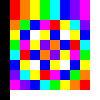

In [101]:
print("Scale:", 10)
print("Palette:", "default_colors")

image = create_matrix_image(matrix_0_to_99[0], scale=10, paint_function=number_to_color)
display(image)

Scale: 5
Palette: default_colors


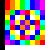

In [102]:
print("Scale:", 5)
print("Palette:", "default_colors")

image = create_matrix_image(matrix_0_to_99[0], scale=5, paint_function=number_to_color, palette=default_colors)
display(image)

Scale: 15
Palette: default_colors


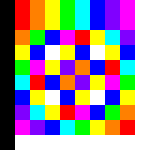

In [103]:
print("Scale:", 15)
print("Palette:", "default_colors")

image = create_matrix_image(matrix_0_to_99[0], scale=15, paint_function=number_to_color, palette=default_colors)
display(image)

Podemos usar distintas paletas

Scale: 10
Palette: blues


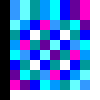

In [62]:
print("Scale:", 10)
print("Palette:", "blues")

image = create_matrix_image(matrix_0_to_99[0], scale=10, paint_function=number_to_color, palette=blues)
display(image)

O representarlo en blanco y negro

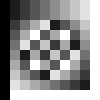

In [63]:
image = create_matrix_image(matrix_0_to_99[0], scale=10, paint_function=number_to_gray)
display(image)

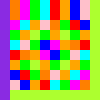

In [64]:
image = create_matrix_image(matrix_0_to_99[0], scale=10, paint_function=number_to_color, palette=neon_colors)
display(image)

Podemos generar imagenes para cualquier sucesión

Fibonacci matrix data:
[[0, 1, 1, 2, 3, 5, 8, 4, 3, 7], [1, 8, 9, 8, 8, 7, 6, 4, 1, 5], [6, 2, 8, 1, 9, 1, 1, 2, 3, 5], [8, 4, 3, 7, 1, 8, 9, 8, 8, 7], [6, 4, 1, 5, 6, 2, 8, 1, 9, 1], [1, 2, 3, 5, 8, 4, 3, 7, 1, 8], [9, 8, 8, 7, 6, 4, 1, 5, 6, 2], [8, 1, 9, 1, 1, 2, 3, 5, 8, 4], [3, 7, 1, 8, 9, 8, 8, 7, 6, 4], [1, 5, 6, 2, 8, 1, 9, 1, 1, 2]]


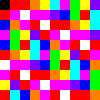

In [104]:
# Generamos una matriz de 10x10 empleando la sucesion de Fibonacci
# ----------------------------------------------------------------

fibonacci_matrix = gen_matrix(dataset_fibonacci, "+", 0, 10, 10)

print("Fibonacci matrix data:")
print(fibonacci_matrix)


image = create_matrix_image(fibonacci_matrix, scale=10, paint_function=number_to_color)
display(image)


Podemos generar distintos tamaños de matriz

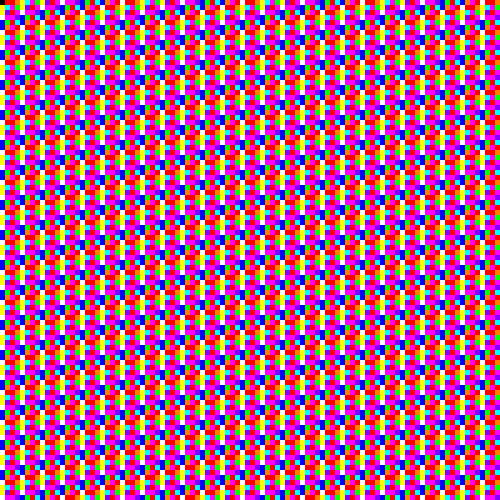

In [68]:
fibonacci_matrix = gen_matrix(dataset_fibonacci, "+", 0, 100, 100)

image = create_matrix_image(fibonacci_matrix, scale=5, paint_function=number_to_color)
display(image)

Podemos usar las sucesiones que necesitan mas parametros pasandoselos en forma de tupla usando el parámetro a_args

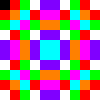

In [75]:
# Generamos una matriz de 10x10 empleando la sucesion de exp_k (n^k) con k = 2
# ----------------------------------------------------------------

function_extra_args = (2,)      # La potencia de la sucesion exp_k (n^k) es 2 (n^2)

exp_k2 = gen_matrix(exp_k, "+", 0, 10, 10, a_args=function_extra_args)
image = create_matrix_image(exp_k2, scale=10, paint_function=number_to_color)
display(image)


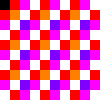

In [76]:
# Generamos una matriz de 10x10 empleando la sucesion de exp_k (n^k) con k = 3
# ----------------------------------------------------------------

function_extra_args = (3,)      # La potencia de la sucesion exp_k (n^k) es 2 (n^2)

exp_k2 = gen_matrix(exp_k, "+", 0, 10, 10, a_args=function_extra_args)
image = create_matrix_image(exp_k2, scale=10, paint_function=number_to_color)
display(image)


#### Supermatrices

La generacion de imagenes de supermatrices esta basada en la concatenacion de las imagenes individuales de cada submatriz

In [91]:
def build_supermatrix(clusters_wide, clusters_high, clusters):
    cluster_matrix = []
    for i in range(clusters_high):
        row = []
        for j in range(clusters_wide):
            row.append(clusters[i*clusters_wide + j])
        cluster_matrix.append(row)
    return cluster_matrix

Probamos la generacion

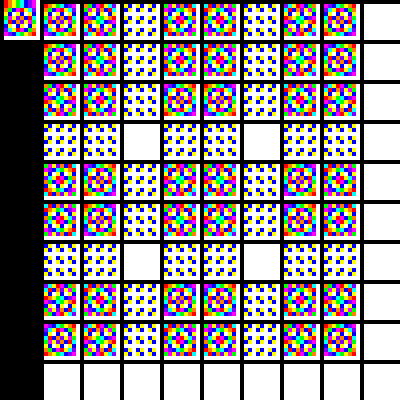

In [105]:
# Configuracion de la sucesion deseada
# --------------------------------

a = producto            # Funcion que calcula los numeros de la sucesion
n_0 = 0                 # Termino inicial de la sucesion

# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# Configuracion de la matriz de clusters deseada
m_w = 10                # Ancho de la matriz de clusters
m_h = 10                # Alto de la matriz de clusters
offset = w*h            # Offset entre clusters (distancia entre clusters)

# Configuracion de la lista de clusters
# --------------------------------
cluster_count = m_w * m_h


# Obtenemos la lista de clusters
# --------------------------------
clusters = gen_matrix_list(a, "+", n_0, w, h, cluster_count, offset)

# Creamos la matriz de clusters
cluster_matrix = build_supermatrix(m_w, m_h, clusters)

# Imagen global
create_supermatrix_image(
    cluster_matrix, 
    scale=4,
    paint_function=number_to_color
)

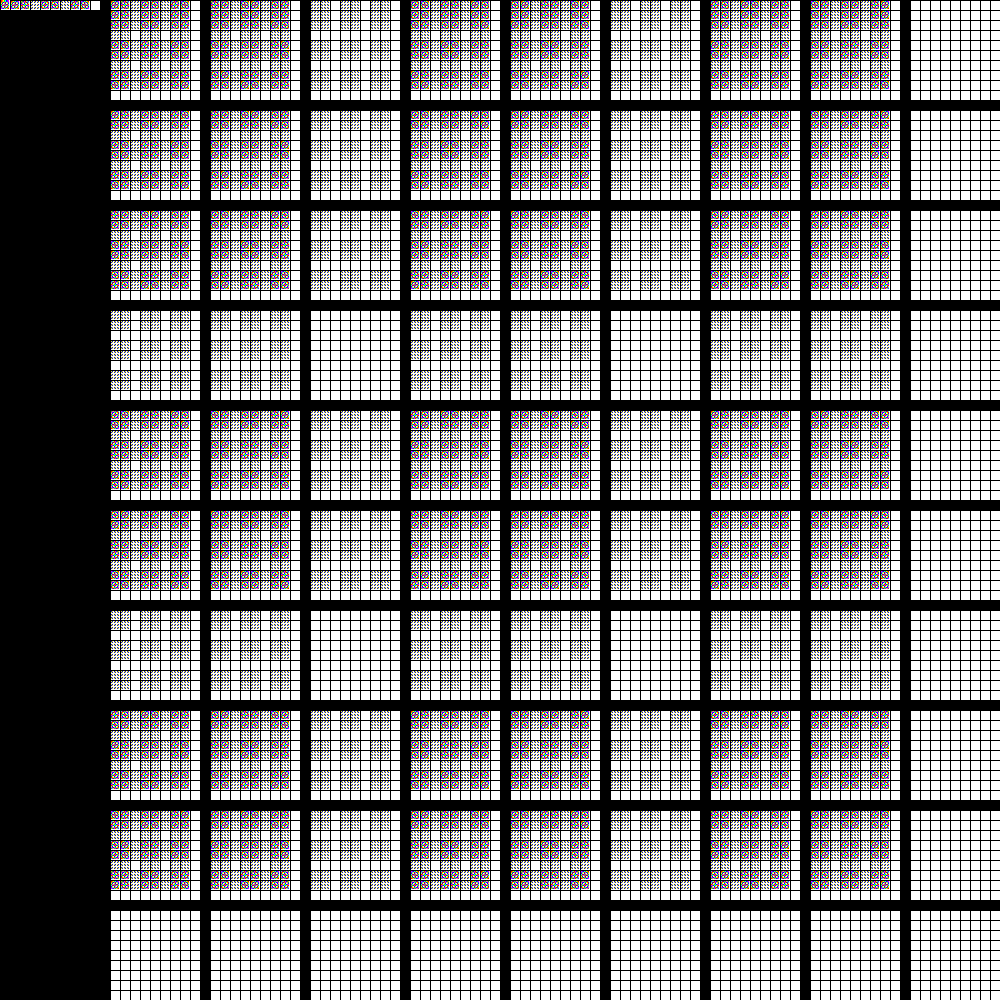

In [93]:
# Configuracion de la sucesion deseada
# --------------------------------

a = producto          # Funcion que calcula los numeros de la sucesion
method = "+"          # Metodo de generacion de la sucesion
n_0 = 0                 # Termino inicial de la sucesion


# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# Configuracion de la matriz de clusters deseada
m_w = 100                # Ancho de la matriz de clusters
m_h = 100                # Alto de la matriz de clusters
offset = w*h            # Offset entre clusters (distancia entre clusters)

# Configuracion de la lista de clusters
# --------------------------------
matrix_count = m_w * m_h


# Obtenemos la lista de clusters
# --------------------------------
clusters = gen_matrix_list(a, method, n_0, w, h, matrix_count, offset)

# Creamos la matriz de clusters
cluster_matrix = build_supermatrix(m_w, m_h, clusters)

# Imagen global
create_supermatrix_image(
    cluster_matrix, 
    scale=1,
    paint_function=number_to_color
)

Podemos facilitar este proceso mediante la implemntacion de ese codigo en una funcion:

In [99]:
def gen_supermatrix_image(a, method, n_0, w, h, m_w, m_h, scale, paint_function, a_args=None):
    '''
    Crea una imagen de una supermatriz de tamaño m_w x m_h

    Params:
        a: funcion que calcula los numeros de la sucesion
        method: metodo de generacion de la sucesion
        n_0: termino inicial de la sucesion
        w: ancho de la matriz
        h: alto de la matriz
        m_w: ancho de la supermatriz
        m_h: alto de la supermatriz
        scale: escala de la imagen
        paint_function: funcion que pinta los numeros de la matriz
    '''
    offset = w*h
    matrix_count = m_w * m_h
    matrix_list = gen_matrix_list(a, method, n_0, w, h, matrix_count, offset, a_args)
    cluster_matrix = build_supermatrix(m_w, m_h, matrix_list)
    return create_supermatrix_image(cluster_matrix, scale, paint_function)


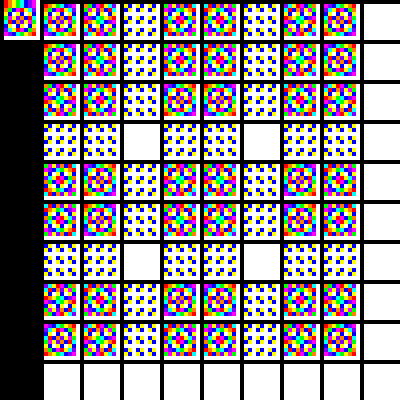

In [106]:
gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/", "
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

# <h2><span style="color:#8e44ad"><span style="font-family:Arial,Helvetica,sans-serif"><u>Experimentación</u></span></span></h2>

### Sucesion de producto

Supermatriz de la sucesion producto bajo el operador RB_10+

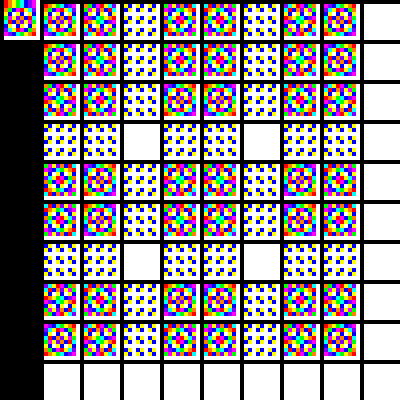

In [107]:
gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/", "
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

Supermatriz de la sucesion producto bajo el operador RB_10-

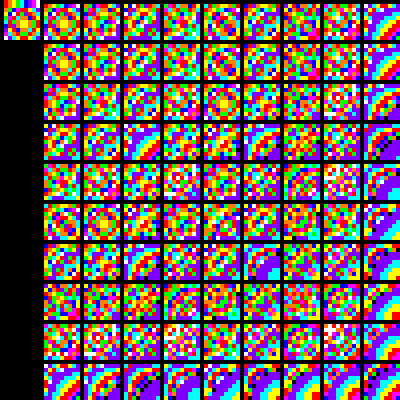

In [108]:
gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/", "
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

Supermatriz de la sucesion producto bajo el operador RB_10+ en blanco y negro

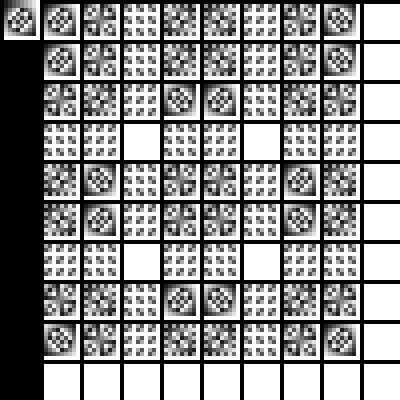

In [109]:
gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_gray # Funcion que asigna un color a cada numero
)

Supermatriz de la sucesion producto bajo el operador RB_10-

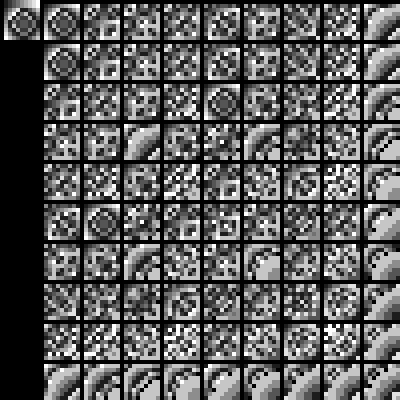

In [110]:
gen_supermatrix_image(
    producto,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_gray # Funcion que asigna un color a cada numero
)

### Sucesion n^k

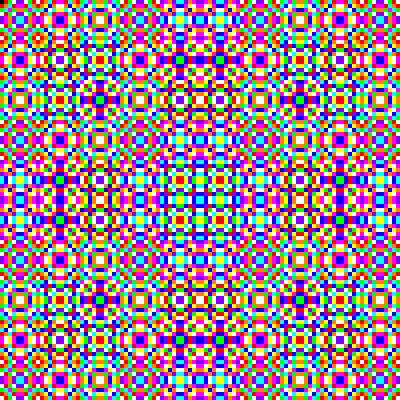

In [113]:
gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(2, )    # Argumentos de la funcion a
)

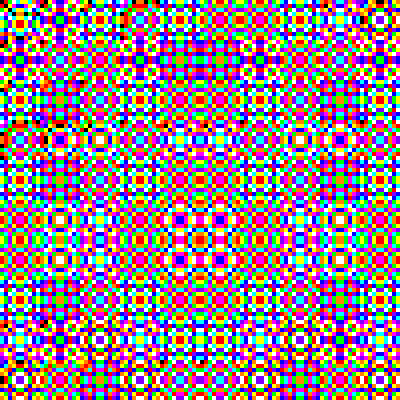

In [114]:
gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "-",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color,# Funcion que asigna un color a cada numero
    a_args=(2, )    # Argumentos de la funcion a
)

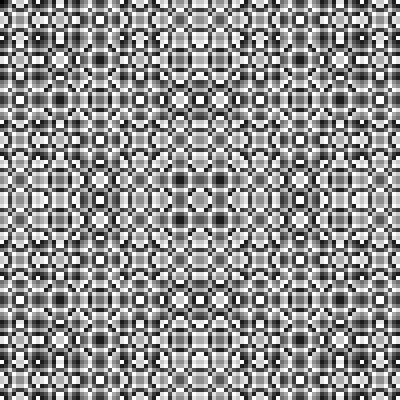

In [115]:
gen_supermatrix_image(
    exp_k,     # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_gray,# Funcion que asigna un color a cada numero
    a_args=(2, )    # Argumentos de la funcion a
)

### Sucesion de n_primo

In [117]:
gen_supermatrix_image(
    n_primo,      # Funcion que calcula los numeros de la sucesion
    "+",          # Metodo de generacion de la sucesion "+", "-", "*", "/",
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    1, 1,           # Ancho y alto de la matriz de clusters
    10,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

ValueError: invalid literal for int() with base 10: 'N'

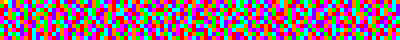

In [142]:
gen_supermatrix_image(
    n_primo,         # Funcion que calcula los numeros de la sucesion
    0,               # Termino inicial de la sucesion
    10, 10,          # Ancho y alto del cluster
    10, 1,           # Ancho y alto de la matriz de clusters
    4,               # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color  # Funcion que asigna un color a cada numero
)

Vista de los numeros primos clusterizados en matriz 10x10

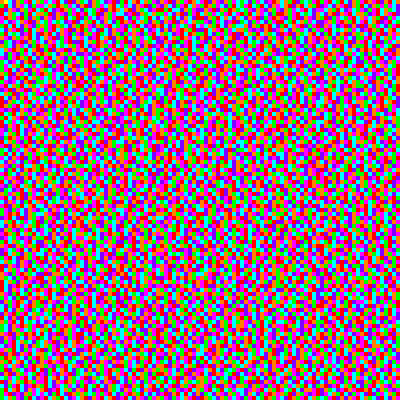

In [143]:
gen_supermatrix_image(
    n_primo,        # Funcion que calcula los numeros de la sucesion
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

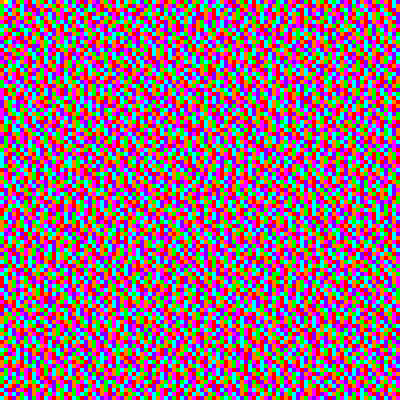

In [84]:
gen_supermatrix_image(
    n_primo,        # Funcion que calcula los numeros de la sucesion
    0,              # Termino inicial de la sucesion
    100, 100,         # Ancho y alto del cluster
    1, 1,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

# Sucesion de fibonacci

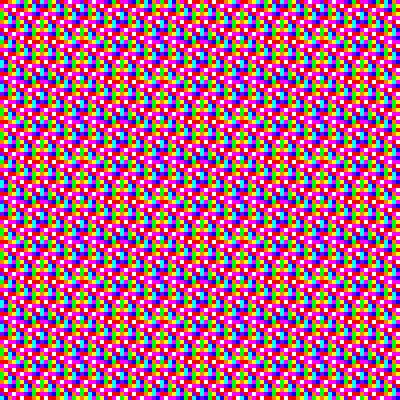

In [58]:
gen_supermatrix_image(
    n_fibonacci,
    0,
    10, 10,
    10, 10,
    4,
    number_to_color
)

Fibonacci visto como una matriz de 1 cluster de 100x100

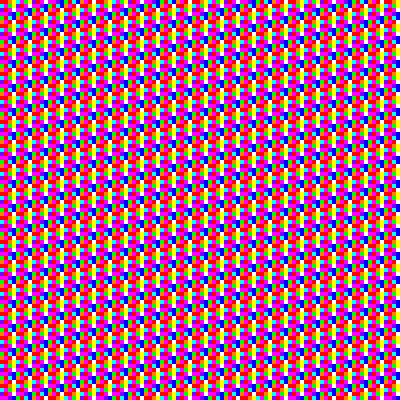

In [59]:
gen_supermatrix_image(
    n_fibonacci,
    0,
    100, 100,
    1, 1,
    4,
    number_to_color
)

### Sucesion Pi_Euler (Custom)

In [80]:
import math

def sucesion_pi_euler(n):
    return int(((math.pi)*(math.e))*n)

# Testeamos la funcion
print("sucesion_pi_euler(0) = ", sucesion_pi_euler(0))
print("sucesion_pi_euler(1) = ", sucesion_pi_euler(1))
print("sucesion_pi_euler(2) = ", sucesion_pi_euler(2))
print("sucesion_pi_euler(3) = ", sucesion_pi_euler(3))
print("sucesion_pi_euler(4) = ", sucesion_pi_euler(4))

sucesion_pi_euler(0) =  0
sucesion_pi_euler(1) =  8
sucesion_pi_euler(2) =  17
sucesion_pi_euler(3) =  25
sucesion_pi_euler(4) =  34


In [81]:
def n_sucesion_pi_euler(n):
    return RB(sucesion_pi_euler(n))

# Testeamos la funcion
print("n_sucesion_pi_euler(0) = ", n_sucesion_pi_euler(0))
print("n_sucesion_pi_euler(1) = ", n_sucesion_pi_euler(1))
print("n_sucesion_pi_euler(2) = ", n_sucesion_pi_euler(2))
print("n_sucesion_pi_euler(3) = ", n_sucesion_pi_euler(3))
print("n_sucesion_pi_euler(4) = ", n_sucesion_pi_euler(4))


n_sucesion_pi_euler(0) =  0
n_sucesion_pi_euler(1) =  8
n_sucesion_pi_euler(2) =  8
n_sucesion_pi_euler(3) =  7
n_sucesion_pi_euler(4) =  7


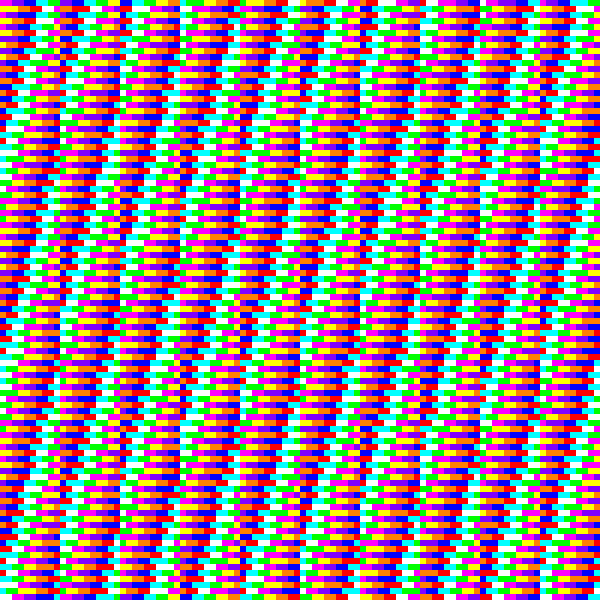

In [85]:
# Obtenemos la representacion de imagen de base
gen_supermatrix_image(
    n_sucesion_pi_euler,
    0,
    10, 10,
    10, 10,
    6,
    number_to_color
)

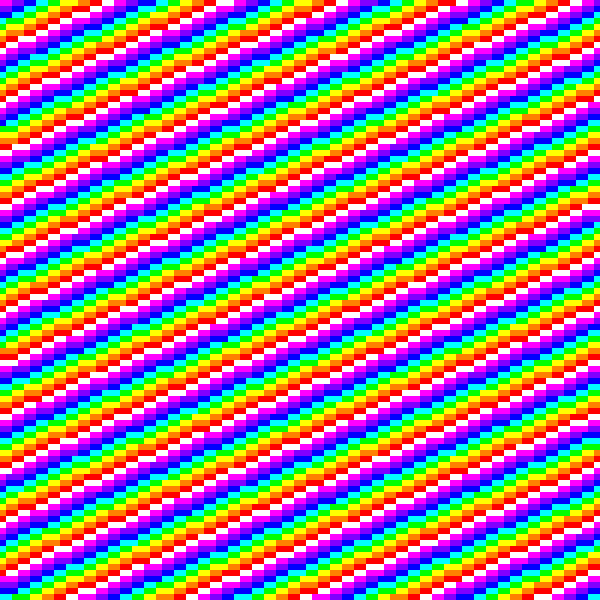

In [86]:
# Obtenemos la representacion de imagen de base
gen_supermatrix_image(
    n_sucesion_pi_euler,
    0,
    100, 100,
    1, 1,
    6,
    number_to_color
)